# Exploratory Data Analysis on House Pricing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To set the plots to seaborn format to beautify them and also to resize the plots
sns.set(rc={'figure.figsize': [20,10]})
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [3]:
# Load the data and view a sample
raw_data = pd.read_csv('data.csv')
raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Let us see a description of the data.

raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


From the above description, there are observations where the price is 0. Such observations are outliers and will have to be removed.

In [7]:
data = raw_data[raw_data['price']>0]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


Yipee! We have removed all observations where houses are acquired for free. We need to know the pricing of houses, not the ones that were given as gift.

I like to divide my variables into numerical and categorical.

In [9]:
# To seperate the numeric data
numeric = data.select_dtypes(include=[np.number])
# Let us see if we have done the right thing
numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [10]:
categorical = data.select_dtypes(exclude=[np.number])
categorical.head()

,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA


Let us begin our Exploration by visualizing the distributions of our numeric variables by the use of histograms

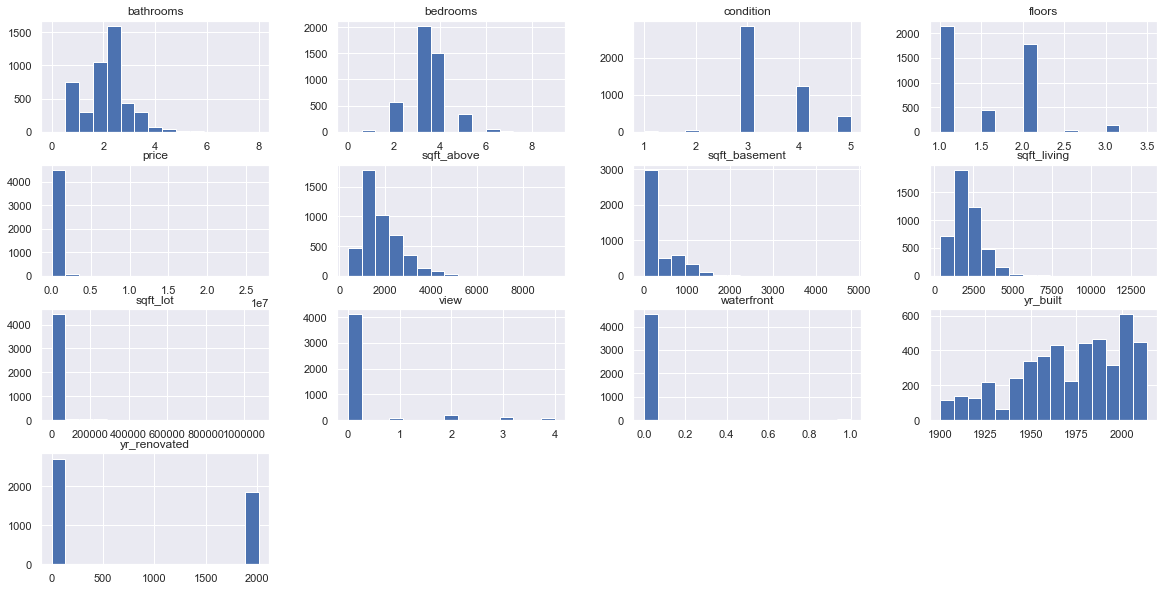

In [11]:
numeric.hist(bins=15, layout=(4,4))
plt.show()

Cities can have a huge effect on prices of houses. Is it so in this situation is what we should wait to see. Let us start by seeing the distribution of the number of houses by cities

In [101]:
city = data.city.value_counts()

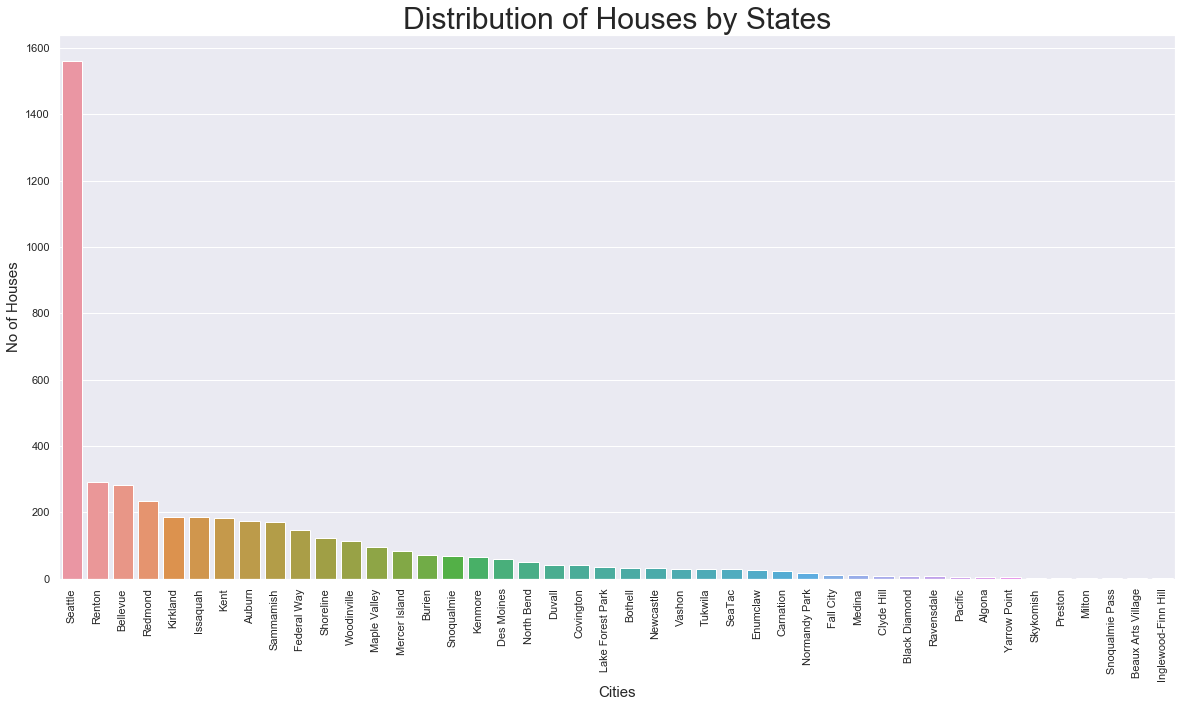

In [28]:
sns.barplot(city.index, city.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Cities', fontsize=15)
plt.ylabel('No of Houses', fontsize=15)
plt.title('Distribution of Houses by States', fontsize=30)
plt.show()

Seattle has by far the highest number of houses in the data. Let us visualize how these cities have affected the prices

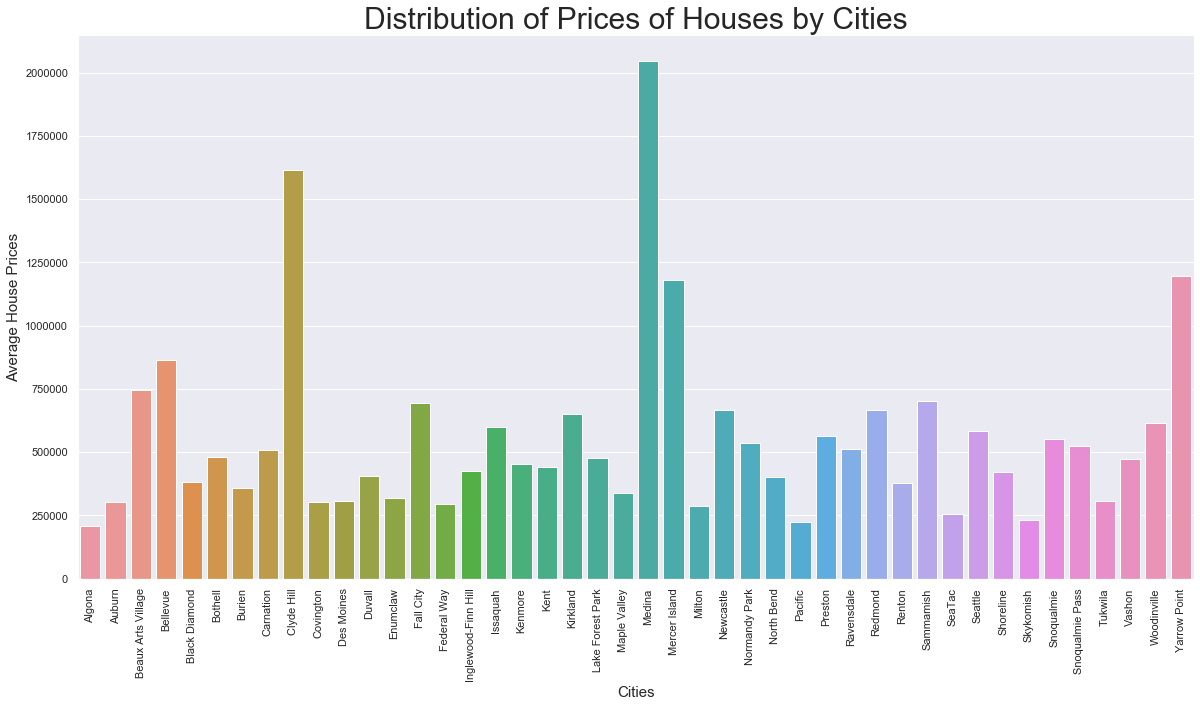

In [33]:
price_by_city = data.groupby(['city'])['price'].mean()

sns.barplot(price_by_city.index, price_by_city.values)
plt.xticks(rotation = 90)
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Average House Prices', fontsize=15)
plt.title('Distribution of Prices of Houses by Cities', fontsize=30)
plt.show()

From the above two plots, we can see that many cities that are expensive have less number of houses than cities that are less expensive.

The effect of the number of bathrooms on the price

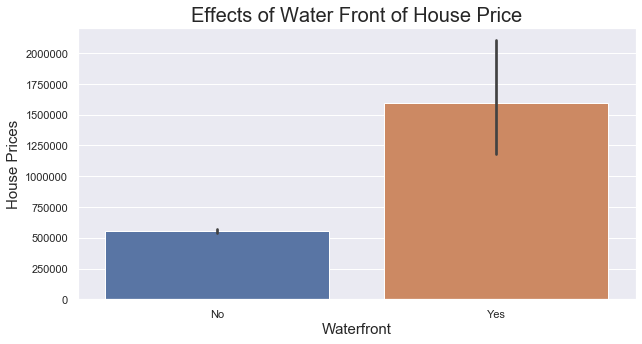

In [67]:
data_2 = data.copy()
data_2['waterfront'] = data['waterfront'].map({1: 'Yes', 0: 'No'})
plt.figure(figsize=(10,5))
sns.barplot('waterfront', 'price', data=data_2)
plt.title('Effects of Water Front of House Price', fontsize=20)
plt.xlabel('Waterfront', fontsize=15)
plt.ylabel('House Prices', fontsize=15)
plt.show()

The above plot shows that the availability of waterfront have an effect on the price of houses

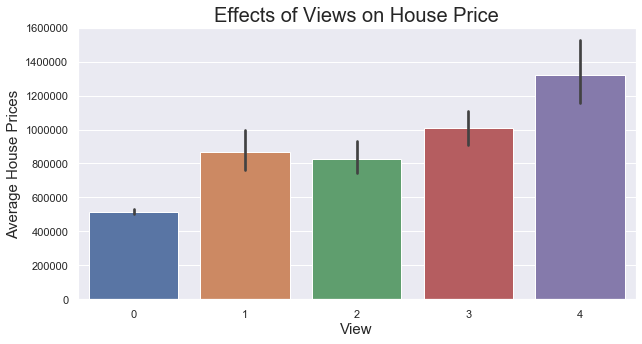

In [102]:
plt.figure(figsize=(10,5))
sns.barplot('view', 'price', data=data)
plt.title('Effects of Views on House Price', fontsize=20)
plt.xlabel('View', fontsize=15)
plt.ylabel('Average House Prices', fontsize=15)
plt.show()

The above plot shows that the View have an effect on the price of houses

#### Let us visualize the scatter plots of all numeric data so as to have an insight into the relationship between these variables

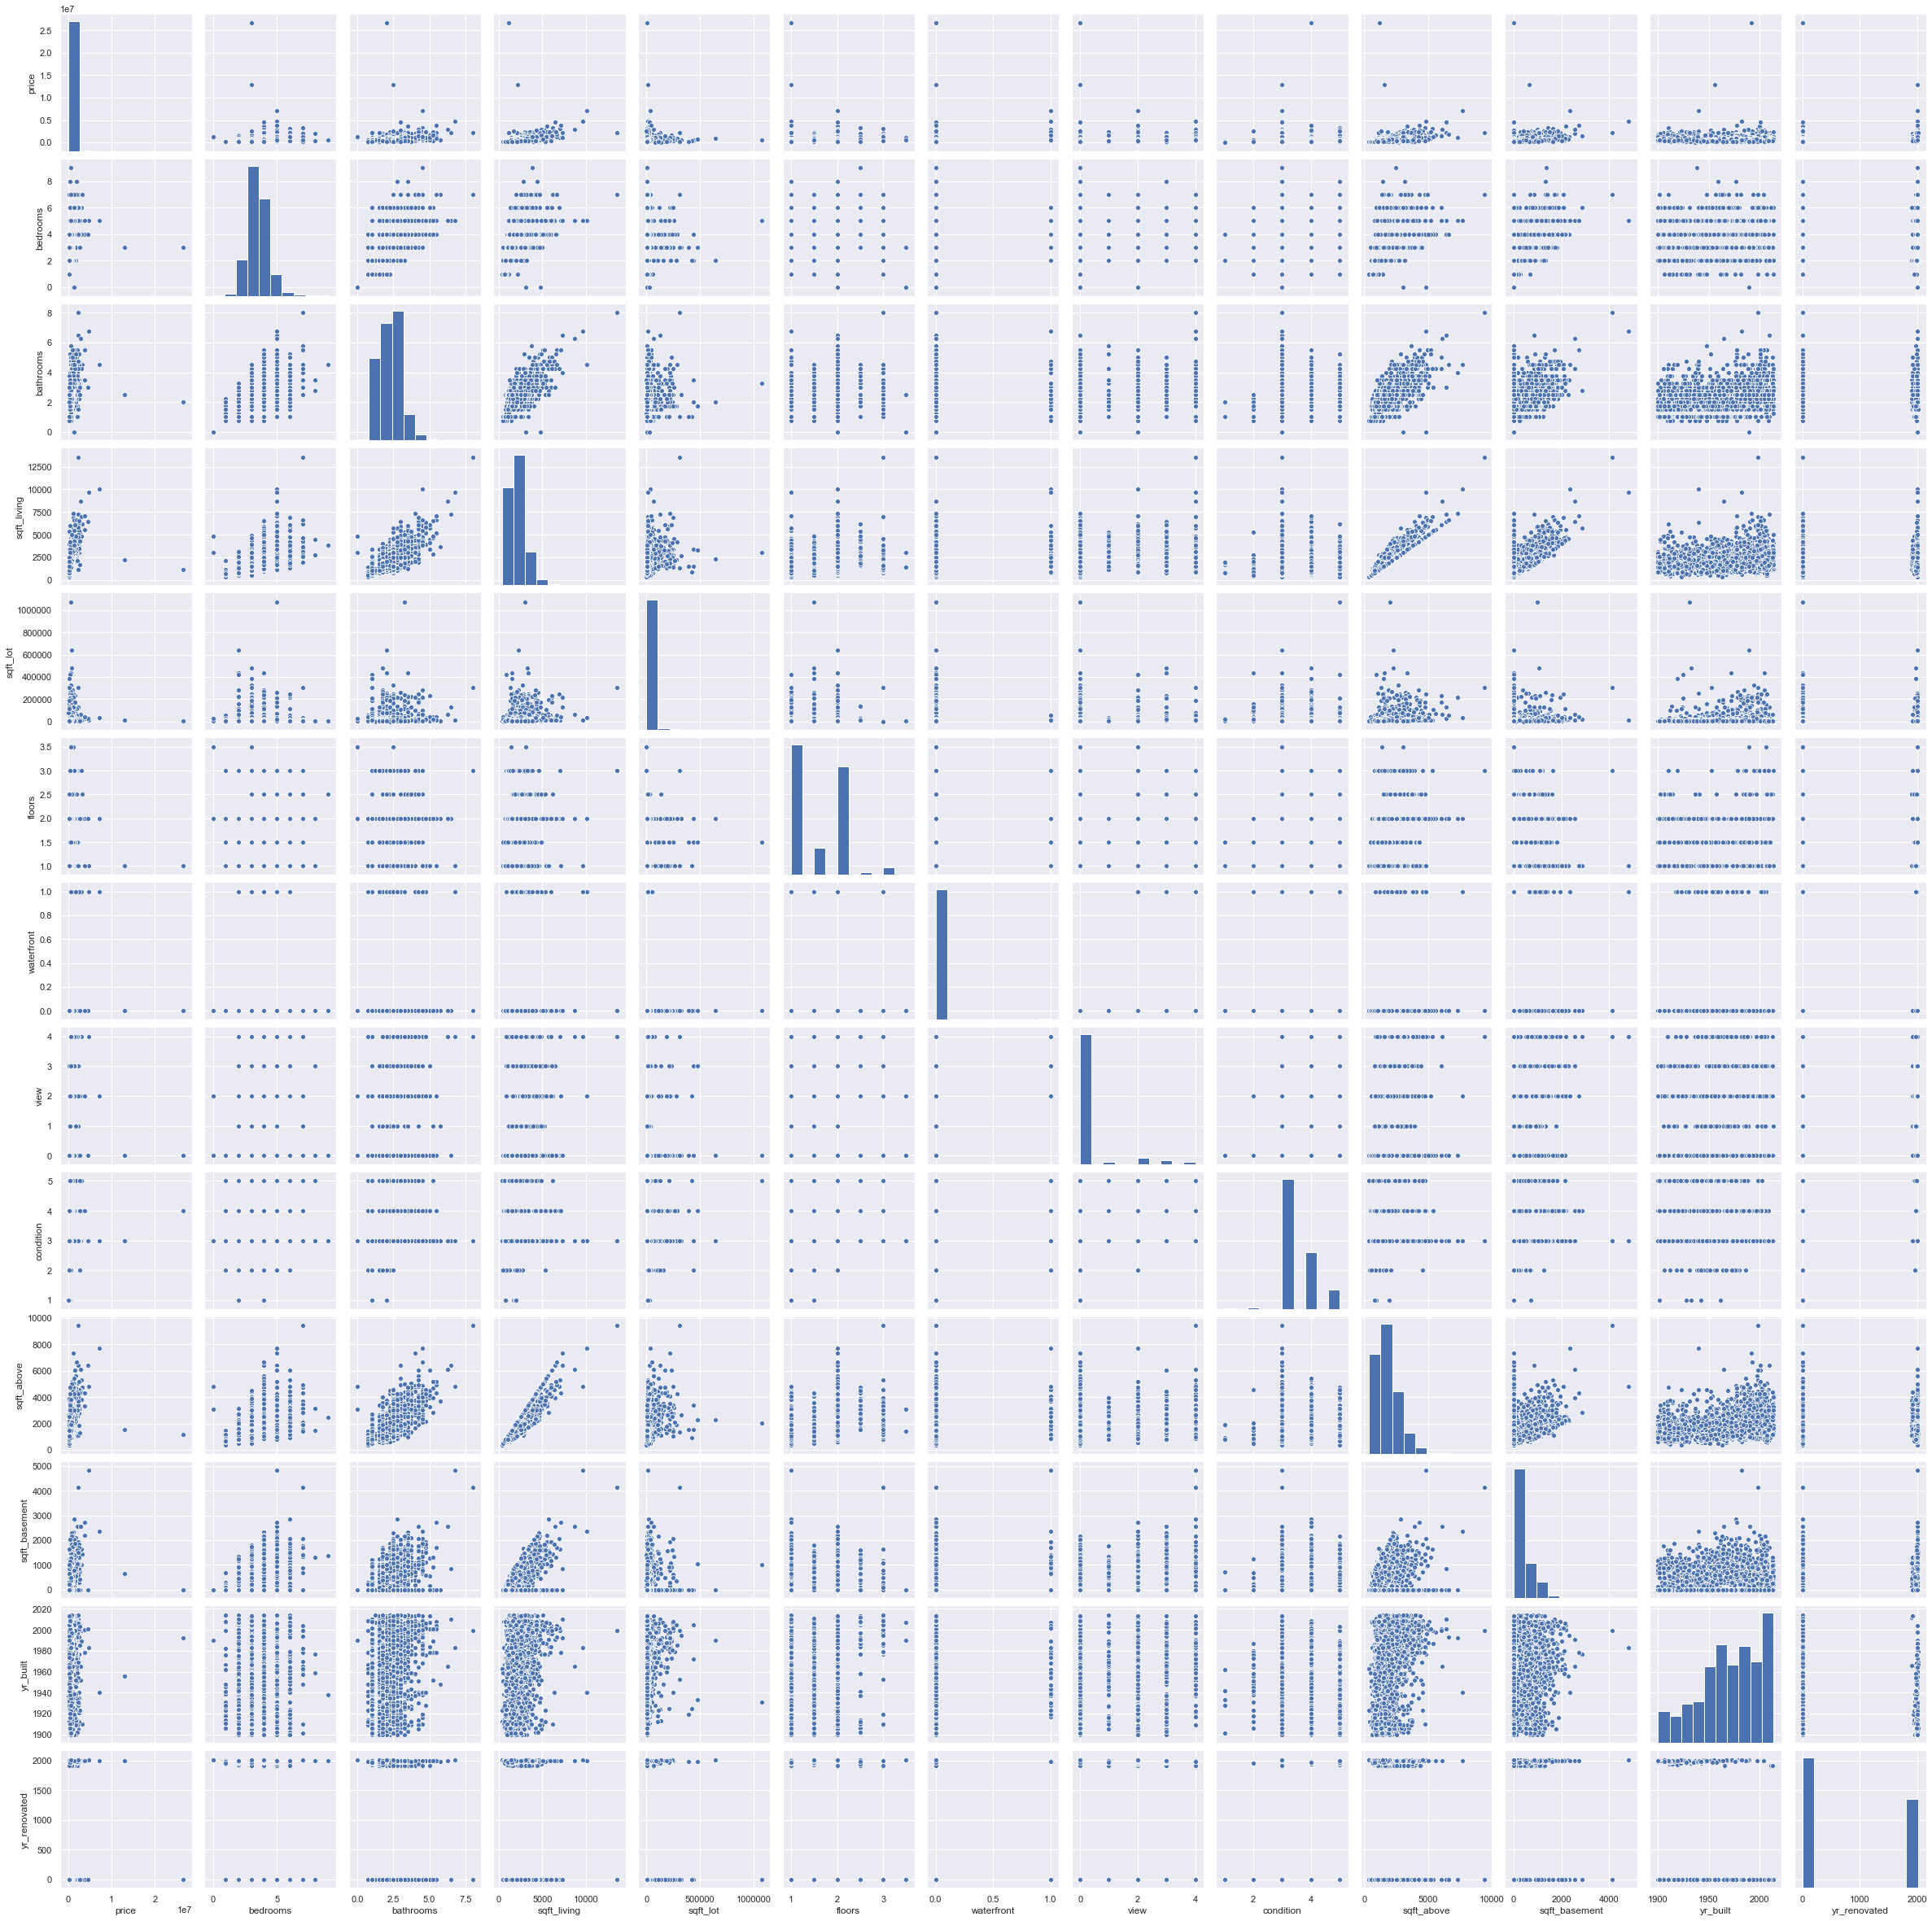

In [52]:
sns.pairplot(numeric)

That scatter plot may look stressful to read, let us look at the correlation coefficients and then visualize it with a heat map. The heat map will aid to quickly identify funny coefficients among variables.

In [55]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


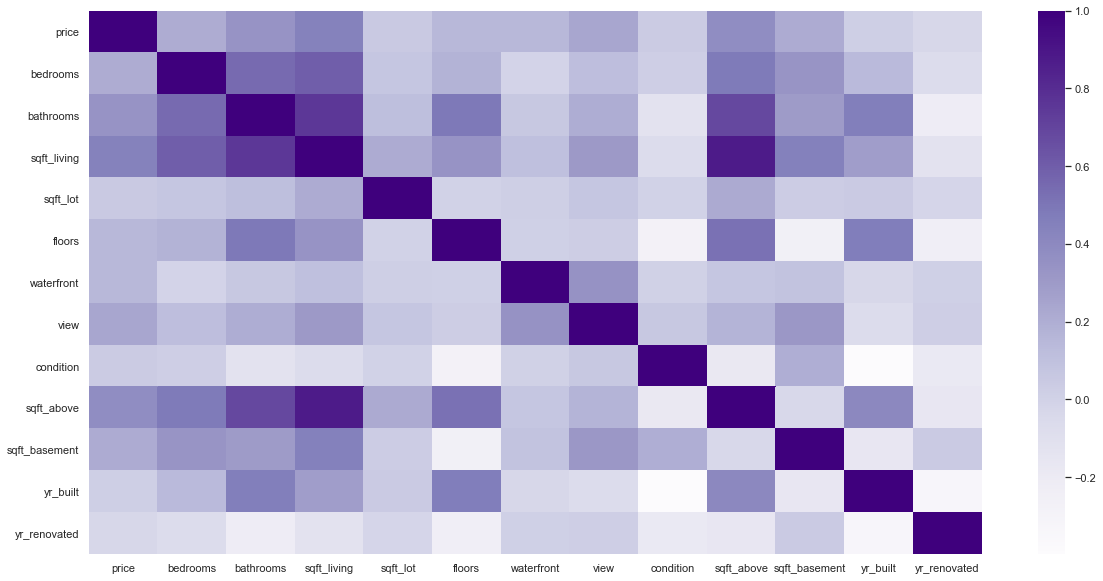

In [62]:
sns.heatmap(data.corr(), cmap='Purples')

The correlation between sqft_living and sqft_above is 0.88, bathrooms and sqft_living is 0.76. Both are high which show possibility of multicollinearity.

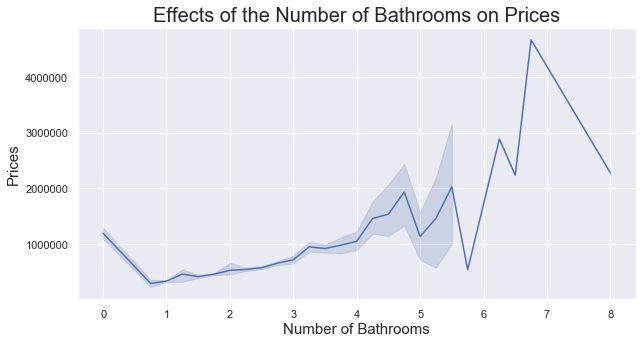

In [78]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'bathrooms', y = 'price', data = data)
plt.title('Effects of the Number of Bathrooms on Prices', fontsize = 20)
plt.xlabel('Number of Bathrooms', fontsize=15)
plt.ylabel('Prices', fontsize=15)
plt.show()

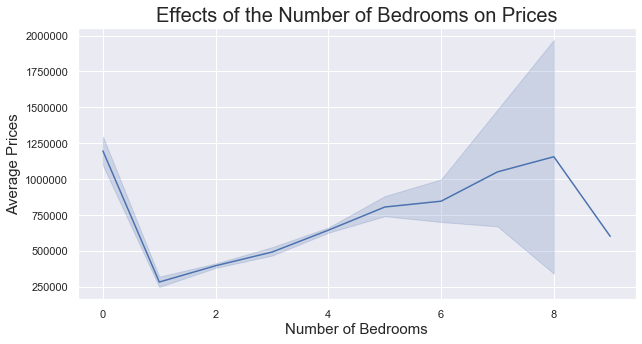

In [79]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'bedrooms', y = 'price', data = data)
plt.title('Effects of the Number of Bedrooms on Prices', fontsize = 20)
plt.xlabel('Number of Bedrooms', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

I do not understand how the average price of houses without bedrooms and bathrooms is high. I guess they have to be removed.

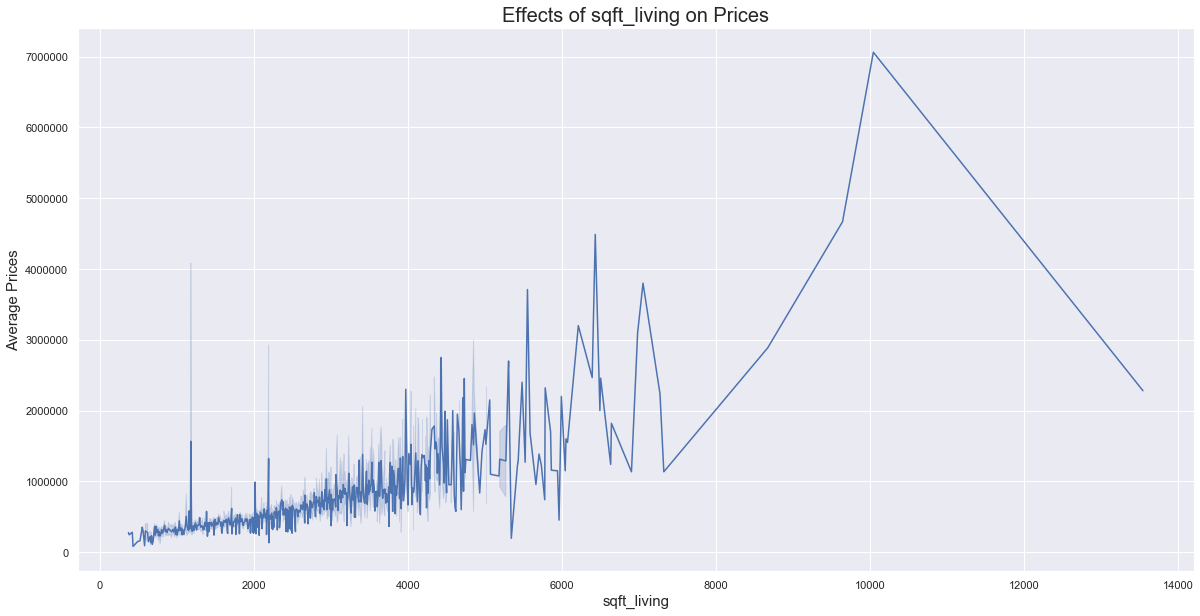

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'sqft_living', y = 'price', data = data)
plt.title('Effects of sqft_living on Prices', fontsize = 20)
plt.xlabel('sqft_living', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

As it was deduced earlier, the correlation between the number of <b>bathrooms</b> and <b>sqft_living</b> is high. This is obvious in their plot against price as they have the almost the same effect. I guess one of them have to be dropped.

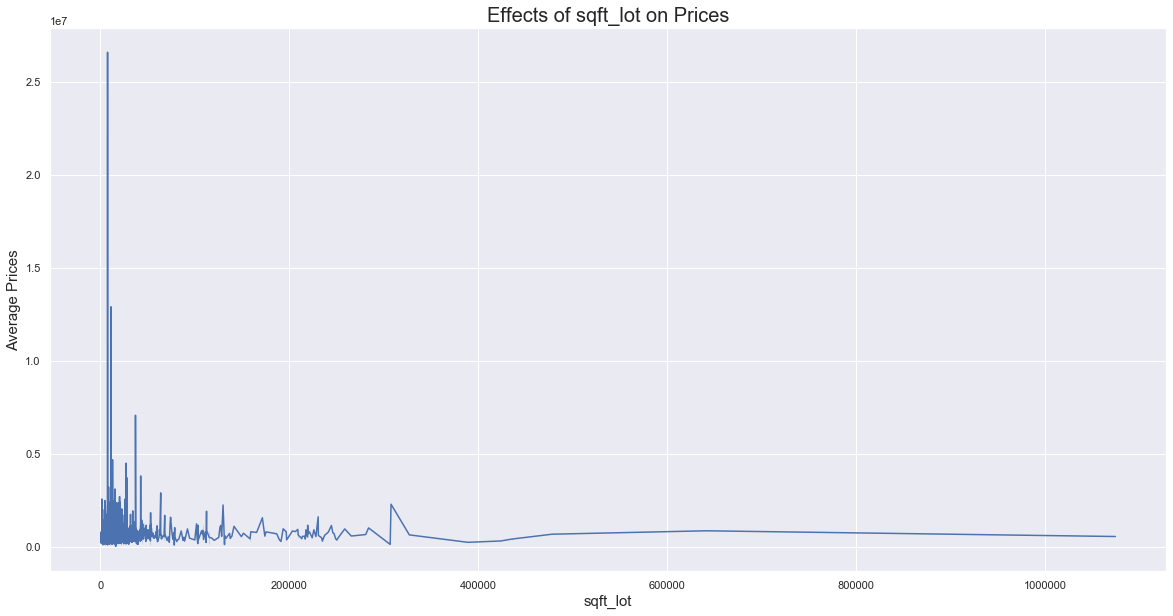

In [85]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'sqft_lot', y = 'price', data = data)
plt.title('Effects of sqft_lot on Prices', fontsize = 20)
plt.xlabel('sqft_lot', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

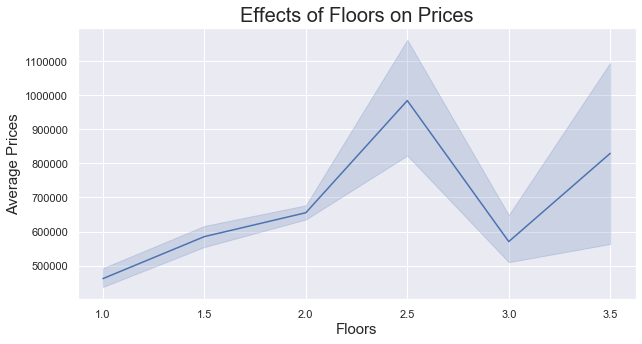

In [86]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'floors', y = 'price', data = data)
plt.title('Effects of Floors on Prices', fontsize = 20)
plt.xlabel('Floors', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

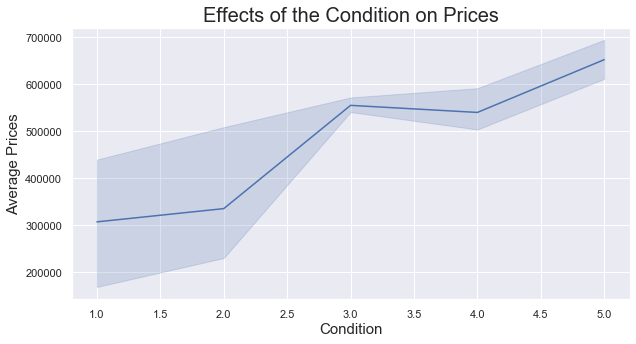

In [87]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'condition', y = 'price', data = data)
plt.title('Effects of the Condition on Prices', fontsize = 20)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

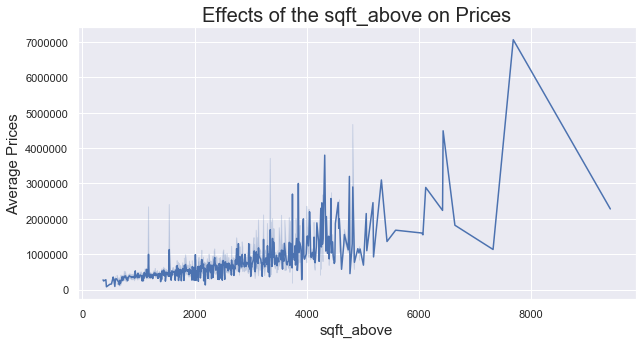

In [88]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'sqft_above', y = 'price', data = data)
plt.title('Effects of the sqft_above on Prices', fontsize = 20)
plt.xlabel('sqft_above', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

<b>sqft_living</b> and <b>sqft_above</b> also have almost the same effect on prices which is a revealed by their high correlation coefficient.

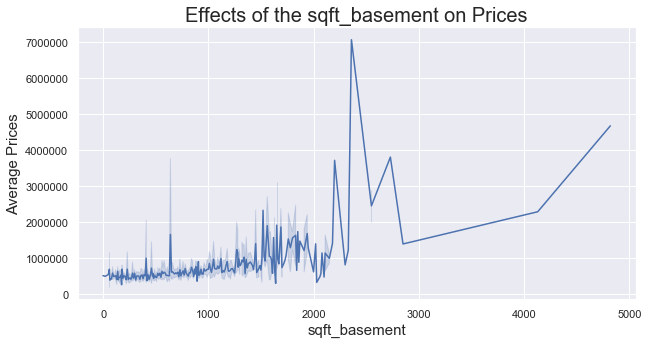

In [90]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'sqft_basement', y = 'price', data = data)
plt.title('Effects of the sqft_basement on Prices', fontsize = 20)
plt.xlabel('sqft_basement', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)
plt.show()

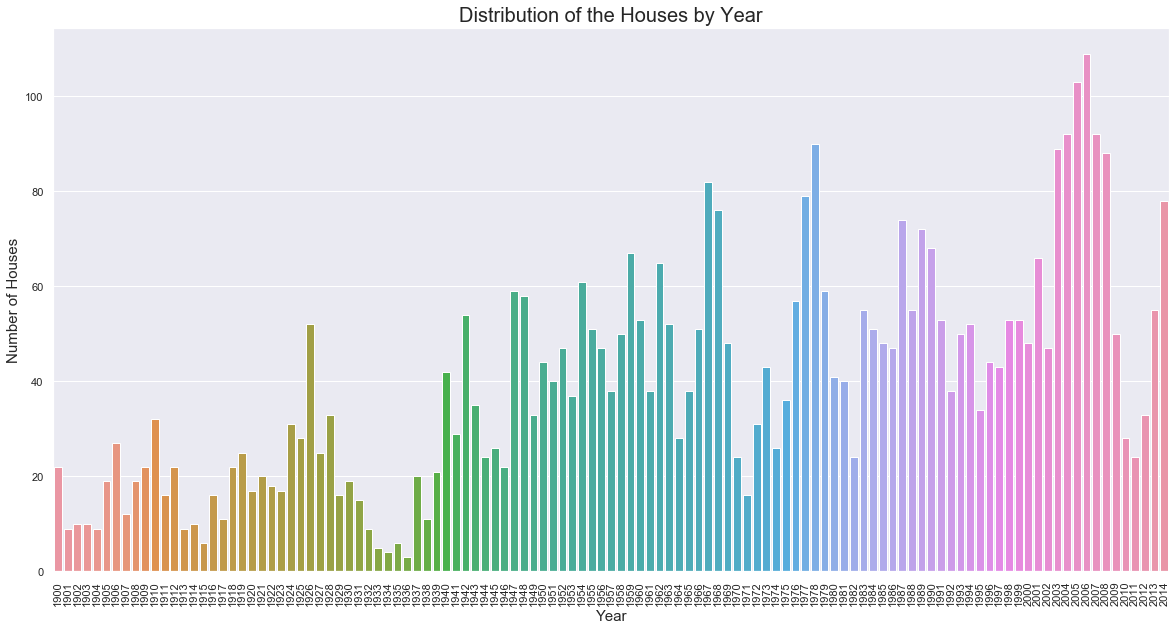

In [98]:
sns.barplot(data.yr_built.value_counts().index, data.yr_built.value_counts().values)
plt.xticks(rotation=90)
plt.title('Distribution of the Houses by Year', fontsize = 20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)
plt.show()

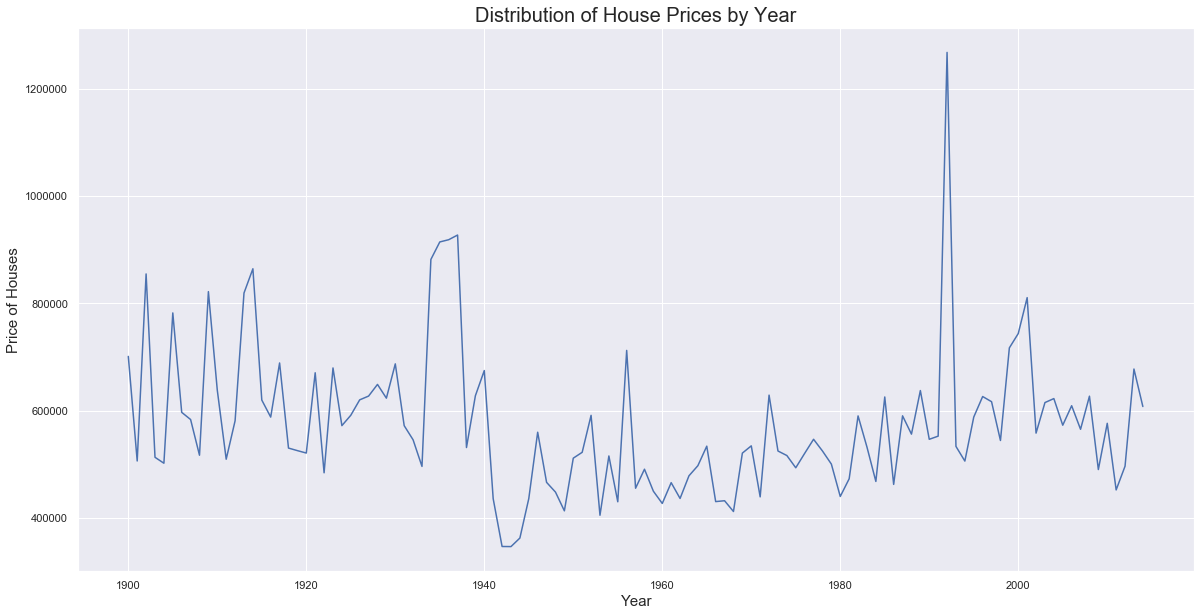

In [100]:
p = data.groupby(['yr_built'])['price'].mean()
sns.lineplot(p.index, p.values)
plt.title('Distribution of House Prices by Year', fontsize = 20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price of Houses', fontsize=15)
plt.show()

### Conclusion

- Seattle has the highest number of houses which may be a result of its relatively cheap houses
- Medina has the most expensive houses so the number of houses are relatively small
- Houses with water fronts are more expensive
- Houses with views are more expensive
- There is a high correlation between sqft_living and sqft_above, and, bathrooms and sqft_living which is an indication of multicollinearity. I suggest sqft_living is dropped
- The price of houses increases as the number of bathrooms increases
- The price of houses increases as the number of bedrooms increases
- Houses with no bathrooms and bedrooms have high prices. There is no explanation for this as they are situated in Seattle and Redmond that both have relatively cheap houses. I suggest they are removed.